# EXPERIMENTS


### IMPORTS


In [1]:
import numpy as np 
from scipy.optimize import minimize
import random
import matplotlib.pyplot as plt
from utils import * 
from solving_algorithms import * 
from tqdm import tqdm

## DIVERSE EXPERIMENTS

Let's try Homotopy, ADMadaptative, iADMadaptative on a simple example :

In [5]:
#initialize parameter 
n=100
d=3
k=4

a_sol,x_sol,y=init_sol(n=n,d=d,k=k,seed=10)

a0=init_a_wo_pad(y,d)
x0=np.zeros(n)

lmbda = 0.1/np.sqrt(d*k/n) 
lam0=shift_coherence_kernel(y)
lamf=0.1/np.sqrt(n)

print('Homotopy:')
error_homo,sparsity_homo,a_opt_homo,x_opt_homo = homotopy_continuation(y=y,a_init=a0,x_init=x0,lmbda_init=lam0,lmbda_final=lamf,eta=0.85,delta=0.85,eps_tol=0.0001,case='IADM')
if success(a_opt_homo,x_opt_homo,a_sol,x_sol)[0]==1:
    print('Homotopy succeed to recover!')
else: 
    print('Homotopy do not succeed')

print('ADM:')
error_adm,spars_adm,a_opt_adm,x_opt_adm=ADM_lamb_adaptatif(y=y,a_init=a0,x_init=x0,max_iter=400,tol=-0.0001,prnt='F')
if success(a_opt_adm,x_opt_adm,a_sol,x_sol)[0]==1:
    print('ADM succeed to recover!')
else: 
    print('ADM do not succeed')

print('IADM:')
error_iadm,spars_iadm,a_opt_iadm,x_opt_iadm=IADM_lamb_adaptatif(y=y,a_init=a0,x_init=x0,beta=0.9,max_iter=400,tol=-0.0001,prnt='F')
if success(a_opt_iadm,x_opt_iadm,a_sol,x_sol)[0]==1:
    print('iADM succeed to recover!')
else: 
    print('iADM do not succeed')

Homotopy:
number of iteration : 38
The error for the last iteration is 0.002328882557313951
Homotopy succeed to recover!
ADM:
ADM do not succeed
IADM:
iADM succeed to recover!


We see here that ADM doesn't succeed to recover a and x while iADM and Homotopy does

Let's plot the evolution of the errors and the sparsity:

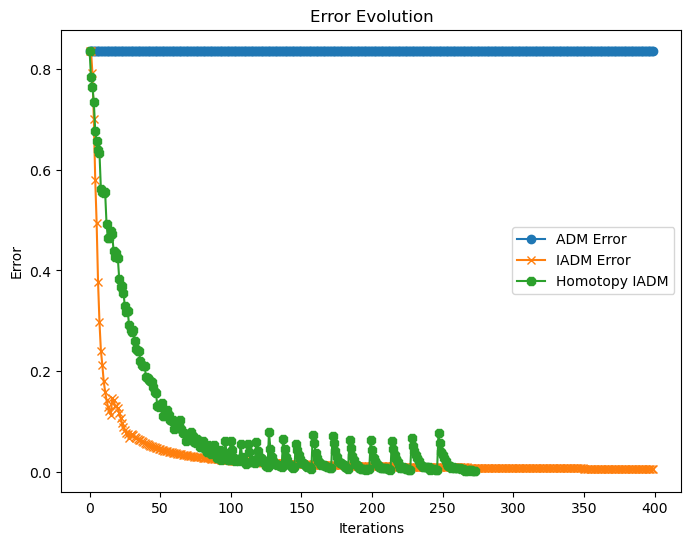

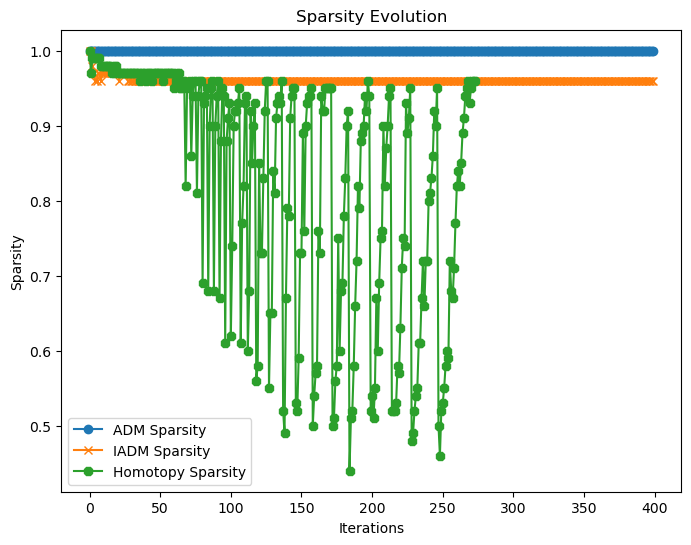

In [6]:
plt.figure(figsize=(8, 6))
plt.plot(error_adm, label='ADM Error', marker='o')
plt.plot(error_iadm, label='IADM Error', marker='x')
plt.plot(error_homo,label='Homotopy IADM',marker='8')
plt.title('Error Evolution')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.legend()
plt.show()

# Figure pour l'évolution de la sparsity
plt.figure(figsize=(8, 6))
plt.plot(spars_adm, label='ADM Sparsity', marker='o')
plt.plot(spars_iadm, label='IADM Sparsity', marker='x')
plt.plot(sparsity_homo, label='Homotopy Sparsity', marker='8')
plt.title('Sparsity Evolution')
plt.xlabel('Iterations')
plt.ylabel('Sparsity')
plt.legend()
plt.show()


We observe that iADM error is strictly decreasing and achieve to recover a and x. Homotopy is not strictly decreasing as at every iteration another iADM algorithm is launched and so the error increase at the begining as it tries to bring more sparsity. The sparsity plot validate this theory as the sparsity in ADM, iADM is pretty much constant through the iterations whereas it variates a lot for Homotopy 

Unfortunately we also see that ADM does not succeed, the more probable cause of this would be that ADM is stuck in a local minima due to the non convex objective. 

Let's show an experiment where ADMadptative succeed to recover and is not stuck in local minima:

In [37]:
#initialize parameter 
n=150
d=4
k=8

a_sol,x_sol,y=init_sol(n=n,d=d,k=k,seed=3)

a0=init_a_wo_pad(y,d)
x0=np.zeros(n)+0.02*np.random.normal(0,1,n)

lmbda = 0.1/np.sqrt(d*k/n) 

error_adm,spars_adm,a_opt_adm,x_opt_adm=ADM_lamb_adaptatif(y=y,a_init=a0,x_init=x0,max_iter=1000,tol=1e-6,prnt='T')
print(success(a_opt_adm,x_opt_adm,a_sol,x_sol))
if success(a_opt_adm,x_opt_adm,a_sol,x_sol)[0]==1:
    print('ADM succeed to recover!')
else: 
    print('ADM do not succeed')

error of the 0th iteration : 1.2568309235982613
error of the 1th iteration : 1.5219341226125132
error of the 2th iteration : 1.3085008989372082
error of the 3th iteration : 1.01751208550467
error of the 4th iteration : 0.8159516093884047
error of the 5th iteration : 0.6894718929794882
error of the 6th iteration : 0.6059485661955418
error of the 7th iteration : 0.5503888355084805
error of the 8th iteration : 0.5107881131030552
error of the 9th iteration : 0.48061882174602905
error of the 10th iteration : 0.4551312806751324
error of the 11th iteration : 0.4308220322515433
error of the 12th iteration : 0.3893260778919866
error of the 13th iteration : 0.37694412489929024
error of the 14th iteration : 0.352926584879818
error of the 15th iteration : 0.32911142627051976
error of the 16th iteration : 0.31323538332547063
error of the 17th iteration : 0.2866189749085409
error of the 18th iteration : 0.2661056588135528
error of the 19th iteration : 0.2362584214071638
error of the 20th iteration :

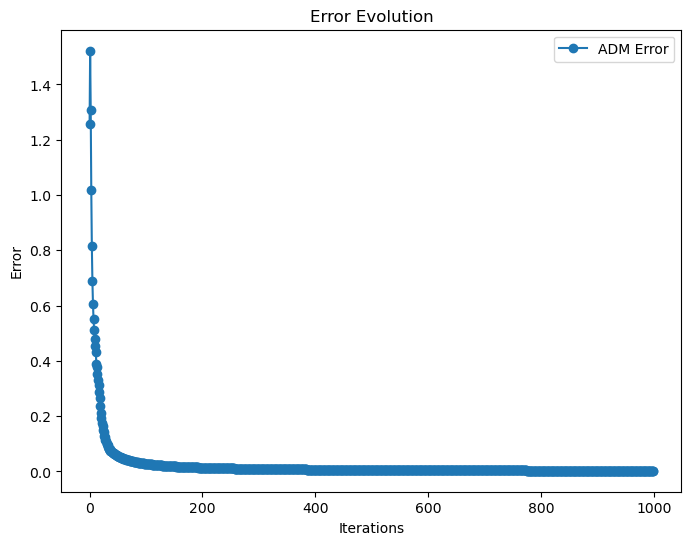

In [38]:
plt.figure(figsize=(8, 6))
plt.plot(error_adm, label='ADM Error', marker='o')
plt.title('Error Evolution')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.legend()
plt.show()

We see here that ADM succeed nevertheless it depends a lot of the datas.

Let's try another experiment by padding the initial vector and optimizing on a larger space:

In [39]:
#initialize parameter 
n=100
d=3
k=4

a_sol,x_sol,y=init_sol(n=n,d=d,k=k,seed=8)

a0=init_a(y,d)
x0=np.zeros(n)
print(f'a is of size 3*d-2 ie : {a0.shape}')


lam0=shift_coherence_kernel(y)
lamf=0.1/np.sqrt(n)

print('Homotopy:')
error_homo,sparsity_homo,a_opt_homo,x_opt_homo = homotopy_continuation(y=y,a_init=a0,x_init=x0,lmbda_init=lam0,lmbda_final=lamf,eta=0.85,delta=0.85,eps_tol=0.0001,case='IADM')

a_opt,x_opt=find_sol(y,a_opt_homo,x_opt_homo,d) ## RECOVER the good shift of a and x and the good shape of a (without using the real solution)

print(success(a_opt,x_opt,a_sol,x_sol))
if success(a_opt,x_opt,a_sol,x_sol)[0]==1:
    print('Homotopy with padding initialization succeed to recover!')
else: 
    print('Homotopy with padding initialization do not succeed')


a is of size 3*d-2 ie : (7,)
Homotopy:
number of iteration : 41
The error for the last iteration is 0.0016841967444615634
(1, 0.0017055003500693936, 0.01602875470365007)
Homotopy with padding initialization succeed to recover!


In [40]:
print('the real a:',a_sol)
print('the padded optimal a',a_opt_homo)
print('the recover a:',a_opt)

the real a: [0.5572806  0.61796514 0.5545786 ]
the padded optimal a [ 1.00177511e-07 -5.57206532e-01 -6.17990919e-01 -5.54624281e-01
 -1.07044547e-04  2.55851322e-07  1.09587527e-07]
the recover a: [-0.55720653 -0.61799092 -0.55462428]


In [41]:
print('the real x:',x_sol)
print('the optimal x',x_opt_homo)
print('the shifted optimal x:',x_opt)

the real x: [0.         1.22664224 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.05104048
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.18418772 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.16741665 0.         0.         0.         0.         0.
 0.         0.         0.         0.

## QUESTION 4 

In [48]:
#initialize parameter 
n=150
d=3
k=3

a_sol_suc,x_sol_suc,y_suc=init_sol(n=n,d=d,k=k,seed=2)

a0=init_a_wo_pad(y_suc,d)
x0=np.zeros(n)

lmbda = 0.1/np.sqrt(d*k/n) 
lam0=shift_coherence_kernel(y_suc)
lamf=0.1/np.sqrt(n)

print('Homotopy:')
error_homo_suc,sparsity_homo_suc,a_opt_homo_suc,x_opt_homo_suc = homotopy_continuation(y=y_suc,a_init=a0,x_init=x0,lmbda_init=lam0,lmbda_final=lamf,eta=0.85,delta=0.85,eps_tol=0.0001,case='IADM')
if success(a_opt_homo_suc,x_opt_homo_suc,a_sol_suc,x_sol_suc)[0]==1:
    print('Homotopy succeed to recover!')
else: 
    print('Homotopy do not succeed')


Homotopy:
number of iteration : 40
The error for the last iteration is 0.0013008252241079531
Homotopy succeed to recover!


Here the Homotopy succeed!

In [60]:
#initialize parameter 
n=20
d=6
k=10

a_sol_fail,x_sol_fail,y_fail=init_sol(n=n,d=d,k=k,seed=2)

a0=init_a_wo_pad(y_fail,d)
x0=np.zeros(n)

lmbda = 0.1/np.sqrt(d*k/n) 
lam0=shift_coherence_kernel(y_fail)
lamf=0.1/np.sqrt(n)

print('Homotopy:')
error_homo_fail,sparsity_homo_fail,a_opt_homo_fail,x_opt_homo_fail = homotopy_continuation(y=y_fail,a_init=a0,x_init=x0,lmbda_init=lam0,lmbda_final=lamf,eta=0.85,delta=0.85,eps_tol=0.0001,case='IADM')
if success(a_opt_homo_fail,x_opt_homo_fail,a_sol_fail,x_sol_fail)[0]==1:
    print('Homotopy succeed to recover!')
else: 
    print('Homotopy do not succeed')


Homotopy:
number of iteration : 37
The error for the last iteration is 0.013020973230069219
Homotopy do not succeed


Here the Homotopy do not succeed. The most natural thing would be that it is stuck in a local minima. This is due to the initialization parameter. Here n is not large enough and so is much more complicated to recover a and x. Indeed if n is large, the distribution sparse et the motif is short the problem will be way easier. For example you can consider an image very large (large n), with a few motif (a short) and very sparse in the image (k small) it is easy to see what is the motif and distribution.  

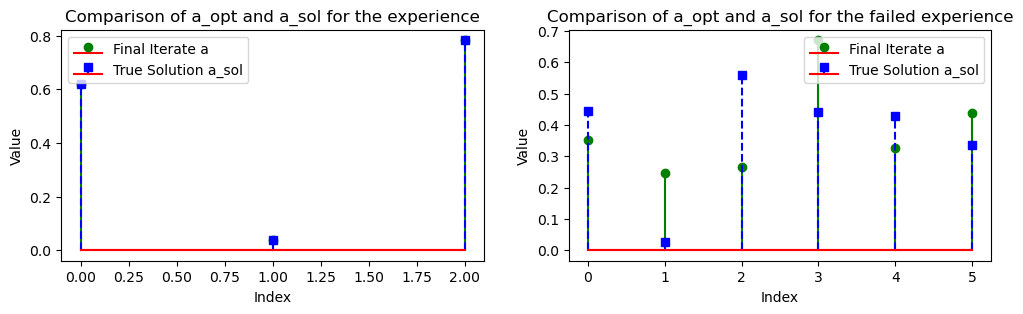

In [72]:
fig, axs = plt.subplots(1, 2, figsize=(12, 3))
axs[0].stem(np.arange(len(a_opt_homo_suc)), a_opt_homo_suc, linefmt='g-', markerfmt='go', basefmt='r-', label='Final Iterate a')
axs[0].stem(np.arange(len(a_sol_suc)), a_sol_suc, linefmt='b--', markerfmt='bs', basefmt='r-', label='True Solution a_sol')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Value')
axs[0].set_title('Comparison of a_opt and a_sol for the experience')
axs[0].legend()

axs[1].stem(np.arange(len(a_opt_homo_fail)), a_opt_homo_fail, linefmt='g-', markerfmt='go', basefmt='r-', label='Final Iterate a')
axs[1].stem(np.arange(len(a_sol_fail)), a_sol_fail, linefmt='b--', markerfmt='bs', basefmt='r-', label='True Solution a_sol')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Value')
axs[1].set_title('Comparison of a_opt and a_sol for the failed experience')
axs[1].legend()

plt.show()

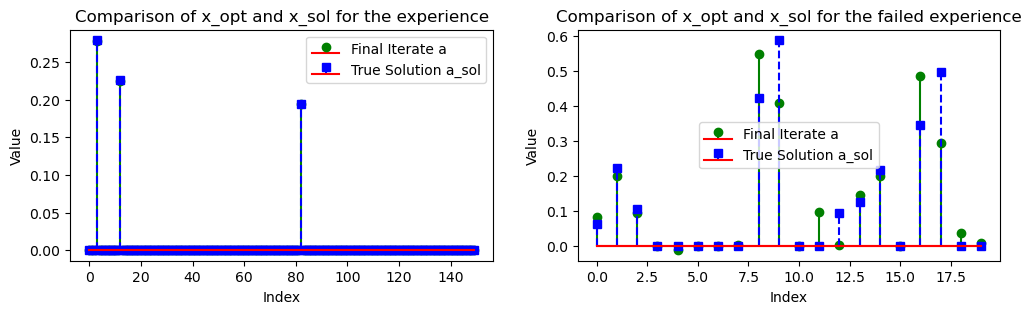

In [73]:
fig, axs = plt.subplots(1, 2, figsize=(12, 3))
axs[0].stem(np.arange(len(x_opt_homo_suc)), x_opt_homo_suc, linefmt='g-', markerfmt='go', basefmt='r-', label='Final Iterate a')
axs[0].stem(np.arange(len(x_sol_suc)), x_sol_suc, linefmt='b--', markerfmt='bs', basefmt='r-', label='True Solution a_sol')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Value')
axs[0].set_title('Comparison of x_opt and x_sol for the experience')
axs[0].legend()

axs[1].stem(np.arange(len(x_opt_homo_fail)), x_opt_homo_fail, linefmt='g-', markerfmt='go', basefmt='r-', label='Final Iterate a')
axs[1].stem(np.arange(len(x_sol_fail)), x_sol_fail, linefmt='b--', markerfmt='bs', basefmt='r-', label='True Solution a_sol')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Value')
axs[1].set_title('Comparison of x_opt and x_sol for the failed experience')
axs[1].legend()

plt.show()

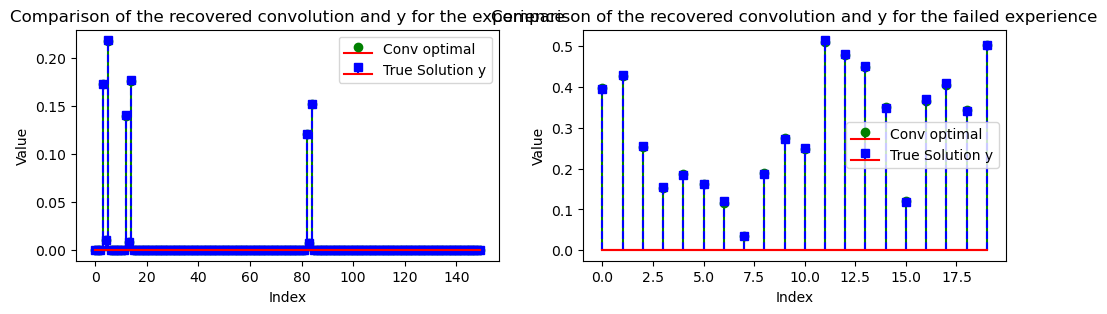

In [74]:
fig, axs = plt.subplots(1, 2, figsize=(12, 3))
axs[0].stem(np.arange(len(x_opt_homo_suc)), cconv(a_opt_homo_suc,x_opt_homo_suc), linefmt='g-', markerfmt='go', basefmt='r-', label='Conv optimal')
axs[0].stem(np.arange(len(x_sol_suc)), y_suc, linefmt='b--', markerfmt='bs', basefmt='r-', label='True Solution y')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Value')
axs[0].set_title('Comparison of the recovered convolution and y for the experience')
axs[0].legend()

axs[1].stem(np.arange(len(x_opt_homo_fail)), cconv(a_opt_homo_fail,x_opt_homo_fail), linefmt='g-', markerfmt='go', basefmt='r-', label='Conv optimal')
axs[1].stem(np.arange(len(x_sol_fail)), y_fail, linefmt='b--', markerfmt='bs', basefmt='r-', label='True Solution y')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Value')
axs[1].set_title('Comparison of the recovered convolution and y for the failed experience')
axs[1].legend()

plt.show()

We can observe that succesfull experiments recover a,x and y perfectly whereas the failed experience do not succeed to recover a and x. Nevertheless we see that the final result of the convolution found with the failed experiment is very close to the original one. 

## QUESTION 5

In [75]:
#13min30sec to execute 

#Initialize parameter 
n=200


succes=[]
for d in tqdm(range(4,10)):
    for k in tqdm(range(6,13)):
        s=0
        a_sol,x_sol,y=init_sol(n=n,d=d,k=k) 
        a0=init_a_wo_pad(y,d)
        x0=np.zeros(n)
        lam0=shift_coherence_kernel(y)
        lamf=0.01/np.sqrt(d*k/n)
        for i in range(10):
            error_homo,sparsity_homo,a_opt_homo,x_opt_homo = homotopy_continuation(y=y,a_init=a0,x_init=x0,lmbda_init=lam0,lmbda_final=lamf,eta=0.85,delta=0.85,eps_tol=0.0001,case='IADM')
            suc,_,_=success(a_opt_homo,x_opt_homo,a_sol,x_sol)
            s+=suc
        succes.append(s/10)


  0%|          | 0/6 [00:00<?, ?it/s]

number of iteration : 34
The error for the last iteration is 0.006262959532936074
number of iteration : 34
The error for the last iteration is 0.006355103887886849
number of iteration : 34
The error for the last iteration is 0.006382440992526207
number of iteration : 34
The error for the last iteration is 0.006281256027273956
number of iteration : 34
The error for the last iteration is 0.0062692064311477514
number of iteration : 34
The error for the last iteration is 0.00628723294014821
number of iteration : 34
The error for the last iteration is 0.006137892747273229
number of iteration : 34
The error for the last iteration is 0.006289546393665725
number of iteration : 34
The error for the last iteration is 0.006277021869691441
number of iteration : 34


The error for the last iteration is 0.006234788947861552
number of iteration : 32
The error for the last iteration is 0.01744459337411664
number of iteration : 32
The error for the last iteration is 0.01740077962927569
number of iteration : 32
The error for the last iteration is 0.017450330811185254
number of iteration : 32
The error for the last iteration is 0.01739699934442238
number of iteration : 32
The error for the last iteration is 0.017417067231027154
number of iteration : 32
The error for the last iteration is 0.017395273269572117
number of iteration : 32
The error for the last iteration is 0.017406472368920456
number of iteration : 32
The error for the last iteration is 0.017408818371791392
number of iteration : 32
The error for the last iteration is 0.017400098447450683
number of iteration : 32


The error for the last iteration is 0.017401676913156836
number of iteration : 35
The error for the last iteration is 0.006188001976502206
number of iteration : 35
The error for the last iteration is 0.006184189414780164
number of iteration : 35
The error for the last iteration is 0.006155663929965245
number of iteration : 35
The error for the last iteration is 0.006122523009201468
number of iteration : 35
The error for the last iteration is 0.006169674514428755
number of iteration : 35
The error for the last iteration is 0.006195534969849684
number of iteration : 35
The error for the last iteration is 0.006212275161355079
number of iteration : 35
The error for the last iteration is 0.006159416341947667
number of iteration : 35
The error for the last iteration is 0.00619370074384128
number of iteration : 35


The error for the last iteration is 0.006176183298809037
number of iteration : 34
The error for the last iteration is 0.008481315752262953
number of iteration : 34
The error for the last iteration is 0.008433143775337916
number of iteration : 34
The error for the last iteration is 0.008470030823679168
number of iteration : 34
The error for the last iteration is 0.008403099030540193
number of iteration : 34
The error for the last iteration is 0.008482925257735346
number of iteration : 34
The error for the last iteration is 0.008457932565118427
number of iteration : 34
The error for the last iteration is 0.008473082217040847
number of iteration : 34
The error for the last iteration is 0.008428677899791594
number of iteration : 34
The error for the last iteration is 0.008300313263229997
number of iteration : 34


The error for the last iteration is 0.008413355417185468
number of iteration : 33
The error for the last iteration is 0.006221373828245189
number of iteration : 33
The error for the last iteration is 0.006213267756594016
number of iteration : 33
The error for the last iteration is 0.006218905162815438
number of iteration : 33
The error for the last iteration is 0.006271203954449213
number of iteration : 33
The error for the last iteration is 0.006287898629079712
number of iteration : 33
The error for the last iteration is 0.006259427205879439
number of iteration : 33
The error for the last iteration is 0.006203213746657866
number of iteration : 33
The error for the last iteration is 0.006223427546836463
number of iteration : 33
The error for the last iteration is 0.00621963272663775
number of iteration : 33


The error for the last iteration is 0.006236716715498411
number of iteration : 33
The error for the last iteration is 0.006478809145209441
number of iteration : 33
The error for the last iteration is 0.00648382175934834
number of iteration : 33
The error for the last iteration is 0.006476742575459299
number of iteration : 33
The error for the last iteration is 0.006490879392257858
number of iteration : 33
The error for the last iteration is 0.006476507476079008
number of iteration : 33
The error for the last iteration is 0.0064792253811139225
number of iteration : 33
The error for the last iteration is 0.006500670093021997
number of iteration : 33
The error for the last iteration is 0.00647254388711926
number of iteration : 33
The error for the last iteration is 0.0064776400027349995
number of iteration : 33


The error for the last iteration is 0.0064798771570090605
number of iteration : 37
The error for the last iteration is 0.005971783213623434
number of iteration : 37
The error for the last iteration is 0.006027647208796519
number of iteration : 37
The error for the last iteration is 0.0060340335345105914
number of iteration : 37
The error for the last iteration is 0.0060265724788317425
number of iteration : 37
The error for the last iteration is 0.00603720867567502
number of iteration : 37
The error for the last iteration is 0.006032009356842399
number of iteration : 37
The error for the last iteration is 0.006004739035501689
number of iteration : 37
The error for the last iteration is 0.006026910929756003
number of iteration : 37
The error for the last iteration is 0.006014306309712596
number of iteration : 37


 17%|█▋        | 1/6 [01:27<07:17, 87.45s/it]

The error for the last iteration is 0.006033819662008789


number of iteration : 34
The error for the last iteration is 0.006415908840545909
number of iteration : 34
The error for the last iteration is 0.006477393854266959
number of iteration : 34
The error for the last iteration is 0.006324591903326492
number of iteration : 34
The error for the last iteration is 0.006369460786945913
number of iteration : 34
The error for the last iteration is 0.006361033000373003
number of iteration : 34
The error for the last iteration is 0.00642158948573223
number of iteration : 34
The error for the last iteration is 0.006367817442216941
number of iteration : 34
The error for the last iteration is 0.00648577273894287
number of iteration : 34
The error for the last iteration is 0.00639039510741823
number of iteration : 34


The error for the last iteration is 0.006366728591079907
number of iteration : 33
The error for the last iteration is 0.008775704162425789
number of iteration : 33
The error for the last iteration is 0.008765522595865055
number of iteration : 33
The error for the last iteration is 0.008718128384462582
number of iteration : 33
The error for the last iteration is 0.008671571135856359
number of iteration : 33
The error for the last iteration is 0.00872843391793415
number of iteration : 33
The error for the last iteration is 0.008762996602341018
number of iteration : 33
The error for the last iteration is 0.008724469990929505
number of iteration : 33
The error for the last iteration is 0.008700269660964549
number of iteration : 33
The error for the last iteration is 0.008746871392963406
number of iteration : 33


The error for the last iteration is 0.008683949786397796
number of iteration : 34
The error for the last iteration is 0.022552849328389184
number of iteration : 34
The error for the last iteration is 0.02257554316416439
number of iteration : 34
The error for the last iteration is 0.02266694301719769
number of iteration : 34
The error for the last iteration is 0.022526259607848636
number of iteration : 34
The error for the last iteration is 0.022179830422842415
number of iteration : 34
The error for the last iteration is 0.022528328087363065
number of iteration : 34
The error for the last iteration is 0.022583149774541893
number of iteration : 34
The error for the last iteration is 0.02276218664365045
number of iteration : 34
The error for the last iteration is 0.02231194150511327
number of iteration : 34


The error for the last iteration is 0.022677733441151843
number of iteration : 35
The error for the last iteration is 0.01907210970647065
number of iteration : 35
The error for the last iteration is 0.019013188741416907
number of iteration : 35
The error for the last iteration is 0.019041470853092803
number of iteration : 35
The error for the last iteration is 0.01902949528269006
number of iteration : 35
The error for the last iteration is 0.018988381758068013
number of iteration : 35
The error for the last iteration is 0.018997153638594274
number of iteration : 35
The error for the last iteration is 0.01900985830919236
number of iteration : 35
The error for the last iteration is 0.01901000291689078
number of iteration : 35
The error for the last iteration is 0.019005557009240743
number of iteration : 35


The error for the last iteration is 0.01903643763400213
number of iteration : 35
The error for the last iteration is 0.014695155365506715
number of iteration : 35
The error for the last iteration is 0.014695321277267347
number of iteration : 35
The error for the last iteration is 0.014693871783566823
number of iteration : 35
The error for the last iteration is 0.014730841062249539
number of iteration : 35
The error for the last iteration is 0.014724005340433926
number of iteration : 35
The error for the last iteration is 0.014697671266769916
number of iteration : 35
The error for the last iteration is 0.01469392224321633
number of iteration : 35
The error for the last iteration is 0.014813609301315523
number of iteration : 35
The error for the last iteration is 0.01469384343431415
number of iteration : 35


The error for the last iteration is 0.014695552225501013
number of iteration : 37
The error for the last iteration is 0.00783345449835753
number of iteration : 37
The error for the last iteration is 0.007804635726330863
number of iteration : 37
The error for the last iteration is 0.007792940054859871
number of iteration : 37
The error for the last iteration is 0.007829426882113086
number of iteration : 37
The error for the last iteration is 0.007821900490330377
number of iteration : 37
The error for the last iteration is 0.007828960882557018
number of iteration : 37
The error for the last iteration is 0.007824044550530816
number of iteration : 37
The error for the last iteration is 0.007830676935360138
number of iteration : 37
The error for the last iteration is 0.007809057549711849
number of iteration : 37


The error for the last iteration is 0.0077965283576136215
number of iteration : 34
The error for the last iteration is 0.01454908318443464
number of iteration : 34
The error for the last iteration is 0.014150991221012035
number of iteration : 34
The error for the last iteration is 0.014679707332953368
number of iteration : 34
The error for the last iteration is 0.014559602004973261
number of iteration : 34
The error for the last iteration is 0.014388805205829863
number of iteration : 34
The error for the last iteration is 0.014396994166482954
number of iteration : 34
The error for the last iteration is 0.01476109169315528
number of iteration : 34
The error for the last iteration is 0.01476455891269446
number of iteration : 34
The error for the last iteration is 0.013695589453904996
number of iteration : 34


 33%|███▎      | 2/6 [03:13<06:33, 98.29s/it]

The error for the last iteration is 0.013878687590179264


number of iteration : 35
The error for the last iteration is 0.005831186209366813
number of iteration : 35
The error for the last iteration is 0.005883744806681502
number of iteration : 35
The error for the last iteration is 0.0058737036182148275
number of iteration : 35
The error for the last iteration is 0.005899229686537753
number of iteration : 35
The error for the last iteration is 0.00589875512414872
number of iteration : 35
The error for the last iteration is 0.005889245829758302
number of iteration : 35
The error for the last iteration is 0.005944293369802549
number of iteration : 35
The error for the last iteration is 0.0059074744156498845
number of iteration : 35
The error for the last iteration is 0.005952234731657546
number of iteration : 35


The error for the last iteration is 0.005904782387626191
number of iteration : 37
The error for the last iteration is 0.006267302667225966
number of iteration : 37
The error for the last iteration is 0.0062478494961488076
number of iteration : 37
The error for the last iteration is 0.006294286722404933
number of iteration : 37
The error for the last iteration is 0.006290880472115912
number of iteration : 37
The error for the last iteration is 0.006250652692316048
number of iteration : 37
The error for the last iteration is 0.006274944611605298
number of iteration : 37
The error for the last iteration is 0.006242851164590405
number of iteration : 37
The error for the last iteration is 0.006266508272491402
number of iteration : 37
The error for the last iteration is 0.006292170544320065
number of iteration : 37


The error for the last iteration is 0.006262395294791557
number of iteration : 35
The error for the last iteration is 0.005252107859913144
number of iteration : 35
The error for the last iteration is 0.005235401371393332
number of iteration : 35
The error for the last iteration is 0.005281434816068538
number of iteration : 35
The error for the last iteration is 0.005246005944352249
number of iteration : 35
The error for the last iteration is 0.005219412355129022
number of iteration : 35
The error for the last iteration is 0.005234275321079905
number of iteration : 35
The error for the last iteration is 0.005293661858263711
number of iteration : 35
The error for the last iteration is 0.005223653619178293
number of iteration : 35
The error for the last iteration is 0.005229910010491154
number of iteration : 35


The error for the last iteration is 0.005181662941105014
number of iteration : 35
The error for the last iteration is 0.016581684112606923
number of iteration : 35
The error for the last iteration is 0.016624680700743702
number of iteration : 35
The error for the last iteration is 0.016627492197435485
number of iteration : 35
The error for the last iteration is 0.01661718575753674
number of iteration : 35
The error for the last iteration is 0.016609188911451377
number of iteration : 35
The error for the last iteration is 0.016612827436898195
number of iteration : 35
The error for the last iteration is 0.01661982569136212
number of iteration : 35
The error for the last iteration is 0.005533033223765885
number of iteration : 35
The error for the last iteration is 0.01661928541801006
number of iteration : 35


The error for the last iteration is 0.016613018070754677
number of iteration : 38
The error for the last iteration is 0.010063300346554612
number of iteration : 38
The error for the last iteration is 0.010038558089646769
number of iteration : 38
The error for the last iteration is 0.010054806048627686
number of iteration : 38
The error for the last iteration is 0.010052878701046352
number of iteration : 38
The error for the last iteration is 0.010053028306932579
number of iteration : 38
The error for the last iteration is 0.010037039092529999
number of iteration : 38
The error for the last iteration is 0.010046289087284352
number of iteration : 38
The error for the last iteration is 0.010036386804698767
number of iteration : 38
The error for the last iteration is 0.010046278005004025
number of iteration : 38


The error for the last iteration is 0.010028935460297185
number of iteration : 38
The error for the last iteration is 0.0046520799635954915
number of iteration : 38
The error for the last iteration is 0.004672545490020795
number of iteration : 38
The error for the last iteration is 0.004620075437756382
number of iteration : 38
The error for the last iteration is 0.0046642149889669195
number of iteration : 38
The error for the last iteration is 0.004643794131986027
number of iteration : 38
The error for the last iteration is 0.004657823062188728
number of iteration : 38
The error for the last iteration is 0.004661088349888432
number of iteration : 38
The error for the last iteration is 0.004648972069517307
number of iteration : 38
The error for the last iteration is 0.004669158295375221
number of iteration : 38


The error for the last iteration is 0.004675162723507014
number of iteration : 37
The error for the last iteration is 0.010770228334893151
number of iteration : 37
The error for the last iteration is 0.010762434626405979
number of iteration : 37
The error for the last iteration is 0.010774093668623993
number of iteration : 37
The error for the last iteration is 0.010763532802514564
number of iteration : 37
The error for the last iteration is 0.010767532491971628
number of iteration : 37
The error for the last iteration is 0.010763246315666808
number of iteration : 37
The error for the last iteration is 0.010767112027214643
number of iteration : 37
The error for the last iteration is 0.01077044998613767
number of iteration : 37
The error for the last iteration is 0.01076470227568346
number of iteration : 37


 50%|█████     | 3/6 [05:24<05:39, 113.32s/it]

The error for the last iteration is 0.010762267335034603


number of iteration : 37
The error for the last iteration is 0.018885210518140523
number of iteration : 37
The error for the last iteration is 0.018966571437999524
number of iteration : 37
The error for the last iteration is 0.019225276766491294
number of iteration : 37
The error for the last iteration is 0.01911691108801269
number of iteration : 37
The error for the last iteration is 0.019271071810238415
number of iteration : 37
The error for the last iteration is 0.01922813221054877
number of iteration : 37
The error for the last iteration is 0.019406008451116317
number of iteration : 37
The error for the last iteration is 0.019305605418092283
number of iteration : 37
The error for the last iteration is 0.01931229443537365
number of iteration : 37


The error for the last iteration is 0.019353978654395844
number of iteration : 36
The error for the last iteration is 0.018813720487524686
number of iteration : 36
The error for the last iteration is 0.01830868771087404
number of iteration : 36
The error for the last iteration is 0.01873365185045515
number of iteration : 36
The error for the last iteration is 0.01884776761559343
number of iteration : 36
The error for the last iteration is 0.018669003262681075
number of iteration : 36
The error for the last iteration is 0.01898683047674039
number of iteration : 36
The error for the last iteration is 0.01903510663332408
number of iteration : 36
The error for the last iteration is 0.018504316615003995
number of iteration : 36
The error for the last iteration is 0.01862079310264153
number of iteration : 36


The error for the last iteration is 0.019012909181660494
number of iteration : 35
The error for the last iteration is 0.004459061985710605
number of iteration : 35
The error for the last iteration is 0.004489230531856968
number of iteration : 35
The error for the last iteration is 0.004490304625880856
number of iteration : 35
The error for the last iteration is 0.004488501454134964
number of iteration : 35
The error for the last iteration is 0.00447408245501578
number of iteration : 35
The error for the last iteration is 0.004516857077647066
number of iteration : 35
The error for the last iteration is 0.0044929333953489265
number of iteration : 35
The error for the last iteration is 0.015593843469948968
number of iteration : 35
The error for the last iteration is 0.015694913007761987
number of iteration : 35


The error for the last iteration is 0.004457383620044307
number of iteration : 35
The error for the last iteration is 0.005238683846347521
number of iteration : 35
The error for the last iteration is 0.005246205668541653
number of iteration : 35
The error for the last iteration is 0.005154713533500601
number of iteration : 35
The error for the last iteration is 0.005242243231889764
number of iteration : 35
The error for the last iteration is 0.0052448619711083985
number of iteration : 35
The error for the last iteration is 0.005248329778491803
number of iteration : 35
The error for the last iteration is 0.0052416875792564285
number of iteration : 35
The error for the last iteration is 0.0052315950139836
number of iteration : 35
The error for the last iteration is 0.0052324876344513275
number of iteration : 35


The error for the last iteration is 0.005234062527503079
number of iteration : 39
The error for the last iteration is 0.004317975568779818
number of iteration : 39
The error for the last iteration is 0.004356300163507525
number of iteration : 39
The error for the last iteration is 0.004340475325665526
number of iteration : 39
The error for the last iteration is 0.004361610610846051
number of iteration : 39
The error for the last iteration is 0.004315733198635539
number of iteration : 39
The error for the last iteration is 0.0043444516526716685
number of iteration : 39
The error for the last iteration is 0.004352995848772574
number of iteration : 39
The error for the last iteration is 0.004318205007244236
number of iteration : 39
The error for the last iteration is 0.004343981303921951
number of iteration : 39


The error for the last iteration is 0.004348891766483907
number of iteration : 38
The error for the last iteration is 0.013976288081764283
number of iteration : 38
The error for the last iteration is 0.01397337506341595
number of iteration : 38
The error for the last iteration is 0.014047466578656591
number of iteration : 38
The error for the last iteration is 0.013962601365628442
number of iteration : 38
The error for the last iteration is 0.013966690589461666
number of iteration : 38
The error for the last iteration is 0.01401774684940212
number of iteration : 38
The error for the last iteration is 0.0140262733218024
number of iteration : 38
The error for the last iteration is 0.01395005420739979
number of iteration : 38
The error for the last iteration is 0.013970021395363807
number of iteration : 38


The error for the last iteration is 0.013967595472403489
number of iteration : 38
The error for the last iteration is 0.007067814680793776
number of iteration : 38
The error for the last iteration is 0.007034065581745412
number of iteration : 38
The error for the last iteration is 0.007084644531553447
number of iteration : 38
The error for the last iteration is 0.006943180801951846
number of iteration : 38
The error for the last iteration is 0.007059112783586967
number of iteration : 38
The error for the last iteration is 0.007046415896815112
number of iteration : 38
The error for the last iteration is 0.007002112678115468
number of iteration : 38
The error for the last iteration is 0.006959389422194417
number of iteration : 38
The error for the last iteration is 0.006968862493139161
number of iteration : 38


 67%|██████▋   | 4/6 [07:42<04:05, 122.89s/it]

The error for the last iteration is 0.006966012752256314


number of iteration : 36
The error for the last iteration is 0.005007448612577533
number of iteration : 36
The error for the last iteration is 0.005137104457979592
number of iteration : 36
The error for the last iteration is 0.005173584401563946
number of iteration : 36
The error for the last iteration is 0.0051152103785643555
number of iteration : 36
The error for the last iteration is 0.005110701984183472
number of iteration : 36
The error for the last iteration is 0.005068500264192295
number of iteration : 36
The error for the last iteration is 0.005049969205418593
number of iteration : 36
The error for the last iteration is 0.00511928720761841
number of iteration : 36
The error for the last iteration is 0.005348880133670959
number of iteration : 36


The error for the last iteration is 0.0050068162173242175
number of iteration : 37
The error for the last iteration is 0.004847198199405667
number of iteration : 37
The error for the last iteration is 0.004863803046521732
number of iteration : 37
The error for the last iteration is 0.004716539277668116
number of iteration : 37
The error for the last iteration is 0.004851983510274878
number of iteration : 37
The error for the last iteration is 0.004854778479590566
number of iteration : 37
The error for the last iteration is 0.004863238592378036
number of iteration : 37
The error for the last iteration is 0.004901171683349403
number of iteration : 37
The error for the last iteration is 0.004847768152628302
number of iteration : 37
The error for the last iteration is 0.0048529901714105044
number of iteration : 37


The error for the last iteration is 0.004842438995076893
number of iteration : 38
The error for the last iteration is 0.004592478022317164
number of iteration : 38
The error for the last iteration is 0.00445537506115571
number of iteration : 38
The error for the last iteration is 0.0045237518988202495
number of iteration : 38
The error for the last iteration is 0.004648927739375537
number of iteration : 38
The error for the last iteration is 0.004550049836628656
number of iteration : 38
The error for the last iteration is 0.004516558184313532
number of iteration : 38
The error for the last iteration is 0.004613070001650618
number of iteration : 38
The error for the last iteration is 0.0044542524780193365
number of iteration : 38
The error for the last iteration is 0.00457297765154928
number of iteration : 38


The error for the last iteration is 0.004549405256106799
number of iteration : 38
The error for the last iteration is 0.004788275753445209
number of iteration : 38
The error for the last iteration is 0.004740610548611468
number of iteration : 38
The error for the last iteration is 0.004698545799586181
number of iteration : 38
The error for the last iteration is 0.0047495399978724215
number of iteration : 38
The error for the last iteration is 0.004699316136086264
number of iteration : 38
The error for the last iteration is 0.004834598984486514
number of iteration : 38
The error for the last iteration is 0.0048214414804802755
number of iteration : 38
The error for the last iteration is 0.004675769514241673
number of iteration : 38
The error for the last iteration is 0.0047369953290921606
number of iteration : 38


The error for the last iteration is 0.004768193050586725
number of iteration : 37
The error for the last iteration is 0.024209351332546127
number of iteration : 37
The error for the last iteration is 0.0069685148846329766
number of iteration : 37
The error for the last iteration is 0.024182786197769302
number of iteration : 37
The error for the last iteration is 0.006922730464061282
number of iteration : 37
The error for the last iteration is 0.006982750591560455
number of iteration : 37
The error for the last iteration is 0.006986904049146602
number of iteration : 37
The error for the last iteration is 0.006946233360446259
number of iteration : 37
The error for the last iteration is 0.02422216366932382
number of iteration : 37
The error for the last iteration is 0.006943433642636394
number of iteration : 37


The error for the last iteration is 0.018070929592994958
number of iteration : 37
The error for the last iteration is 0.016386774998076496
number of iteration : 37
The error for the last iteration is 0.01678042214289692
number of iteration : 37
The error for the last iteration is 0.01644620251068435
number of iteration : 37
The error for the last iteration is 0.016551325929102266
number of iteration : 37
The error for the last iteration is 0.01649505898550797
number of iteration : 37
The error for the last iteration is 0.01667384949243434
number of iteration : 37
The error for the last iteration is 0.0167202916634352
number of iteration : 37
The error for the last iteration is 0.016602465648729706
number of iteration : 37
The error for the last iteration is 0.016446354779154057
number of iteration : 37


The error for the last iteration is 0.01654827955375686
number of iteration : 38
The error for the last iteration is 0.004414235442477334
number of iteration : 38
The error for the last iteration is 0.004447607361012724
number of iteration : 38
The error for the last iteration is 0.004254957785133801
number of iteration : 38
The error for the last iteration is 0.0043935229650760525
number of iteration : 38
The error for the last iteration is 0.004315086029020303
number of iteration : 38
The error for the last iteration is 0.004330681030906796
number of iteration : 38
The error for the last iteration is 0.004273851345404439
number of iteration : 38
The error for the last iteration is 0.004390051318890345
number of iteration : 38
The error for the last iteration is 0.004449816581432614
number of iteration : 38


 83%|████████▎ | 5/6 [10:13<02:13, 133.09s/it]

The error for the last iteration is 0.00427631355098157


number of iteration : 36
The error for the last iteration is 0.004534849236935299
number of iteration : 36
The error for the last iteration is 0.004405199529282493
number of iteration : 36
The error for the last iteration is 0.004549353207954996
number of iteration : 36
The error for the last iteration is 0.00488654317792916
number of iteration : 36
The error for the last iteration is 0.004892642046320708
number of iteration : 36
The error for the last iteration is 0.004542605791608317
number of iteration : 36
The error for the last iteration is 0.00449766694553102
number of iteration : 36
The error for the last iteration is 0.004484887198995419
number of iteration : 36
The error for the last iteration is 0.004470288693361871
number of iteration : 36


The error for the last iteration is 0.004626208669149566
number of iteration : 38
The error for the last iteration is 0.0040285961188478644
number of iteration : 38
The error for the last iteration is 0.004043191909021543
number of iteration : 38
The error for the last iteration is 0.004000658081004328
number of iteration : 38
The error for the last iteration is 0.004004269352523566
number of iteration : 38
The error for the last iteration is 0.004009909269219927
number of iteration : 38
The error for the last iteration is 0.0040242213286595645
number of iteration : 38
The error for the last iteration is 0.00403623862719909
number of iteration : 38
The error for the last iteration is 0.004010577748532398
number of iteration : 38
The error for the last iteration is 0.0038034741000925335
number of iteration : 38


The error for the last iteration is 0.0040727718985341
number of iteration : 38
The error for the last iteration is 0.02362311379195921
number of iteration : 38
The error for the last iteration is 0.023764887209543447
number of iteration : 38
The error for the last iteration is 0.01092837667843703
number of iteration : 38
The error for the last iteration is 0.023456176639509045
number of iteration : 38
The error for the last iteration is 0.004139028149050877
number of iteration : 38
The error for the last iteration is 0.023249075604716396
number of iteration : 38
The error for the last iteration is 0.004110352190597588
number of iteration : 38
The error for the last iteration is 0.023377884670351717
number of iteration : 38
The error for the last iteration is 0.023854914126712198
number of iteration : 38


The error for the last iteration is 0.023686229864504076
number of iteration : 38
The error for the last iteration is 0.01800888261291615
number of iteration : 38
The error for the last iteration is 0.018037295292625887
number of iteration : 38
The error for the last iteration is 0.018044387471239244
number of iteration : 38
The error for the last iteration is 0.018021153390983317
number of iteration : 38
The error for the last iteration is 0.018138121527474144
number of iteration : 38
The error for the last iteration is 0.018100602430526448
number of iteration : 38
The error for the last iteration is 0.0181689509416877
number of iteration : 38
The error for the last iteration is 0.018036197654417753
number of iteration : 38
The error for the last iteration is 0.017953418100838225
number of iteration : 38


The error for the last iteration is 0.018024300766273642
number of iteration : 38
The error for the last iteration is 0.004265015395684961
number of iteration : 38
The error for the last iteration is 0.004310957959066497
number of iteration : 38
The error for the last iteration is 0.0042776670887110756
number of iteration : 38
The error for the last iteration is 0.00427127579272433
number of iteration : 38
The error for the last iteration is 0.004270154604171659
number of iteration : 38
The error for the last iteration is 0.004286062627795992
number of iteration : 38
The error for the last iteration is 0.004265800878126276
number of iteration : 38
The error for the last iteration is 0.004276339716937411
number of iteration : 38
The error for the last iteration is 0.004256213140919657
number of iteration : 38


The error for the last iteration is 0.004266537477726865
number of iteration : 39
The error for the last iteration is 0.003948061586252729
number of iteration : 39
The error for the last iteration is 0.003976371295391759
number of iteration : 39
The error for the last iteration is 0.0039795769001303525
number of iteration : 39
The error for the last iteration is 0.003984549501778433
number of iteration : 39
The error for the last iteration is 0.003963961161265895
number of iteration : 39
The error for the last iteration is 0.003978270030595436
number of iteration : 39
The error for the last iteration is 0.003963827514777261
number of iteration : 39
The error for the last iteration is 0.0039671819267917815
number of iteration : 39
The error for the last iteration is 0.0039594844759240485
number of iteration : 39


The error for the last iteration is 0.004004076194135477
number of iteration : 38
The error for the last iteration is 0.0042170465729680084
number of iteration : 38
The error for the last iteration is 0.004231675180034363
number of iteration : 38
The error for the last iteration is 0.004218274641369651
number of iteration : 38
The error for the last iteration is 0.004213665023335448
number of iteration : 38
The error for the last iteration is 0.004257367519492093
number of iteration : 38
The error for the last iteration is 0.004254190680366081
number of iteration : 38
The error for the last iteration is 0.004224304127366687
number of iteration : 38
The error for the last iteration is 0.004241987210484913
number of iteration : 38
The error for the last iteration is 0.004221130189104691
number of iteration : 38


100%|██████████| 6/6 [13:11<00:00, 131.91s/it]

The error for the last iteration is 0.004200356563004072


In [77]:
matrix_succes_prob=np.zeros((6,7))
for i in range(6):
    matrix_succes_prob[i,]=succes[i*7:i*7+7]
matrix_succes_prob

array([[1. , 0. , 1. , 0. , 1. , 1. , 1. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 1. , 0.1, 0. , 1. , 0. ],
       [0. , 0. , 0.8, 1. , 1. , 0. , 0. ],
       [1. , 1. , 1. , 1. , 0. , 0. , 1. ],
       [1. , 1. , 0.2, 0. , 1. , 1. , 1. ]])

In [79]:
matrix_succes=np.zeros((6,7))
matrix_succes[matrix_succes_prob<0.5]=0
matrix_succes[matrix_succes_prob>=0.5]=1
matrix_succes

array([[1., 0., 1., 0., 1., 1., 1.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 0., 0., 1.],
       [1., 1., 0., 0., 1., 1., 1.]])

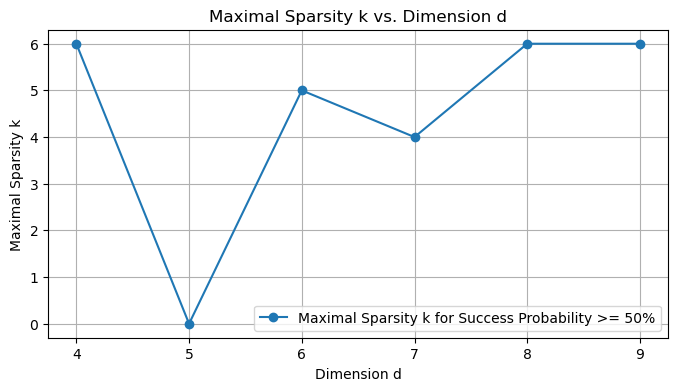

In [81]:
max_k_values = []
for i, d in enumerate(d_values):
    success_rates = matrix_succes[i]
    k_indices = np.where(success_rates >= 0.5)[0]
    max_k = np.max(k_indices) if len(k_indices) > 0 else np.nan 
    max_k_values.append(max_k)

# Tracer le graphique
plt.figure(figsize=(8, 4))
plt.plot(d_values, max_k_values, 'o-', label='Maximal Sparsity k for Success Probability >= 50%')
plt.xlabel('Dimension d')
plt.ylabel('Maximal Sparsity k')
plt.title('Maximal Sparsity k vs. Dimension d')
plt.legend()
plt.grid(True)
plt.show()

The interpretation of this graphic is a bit complicated as we expected that as the dimension increases the maximal sparsity k for success would be lower. But there, this graphic highlights the fact that the algorithm is very sensible to the data that you give to it as it's not the same data set for the ten experiment (on which we compute the success probability).